In [114]:
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.init as init
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/Users/ponynie/Developer/Python_Code/IntroDMLabChula/Final_Project/children anemia.csv')
data.describe(include='all')

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Current marital status,Currently residing with husband/partner,When child put to breast,Had fever in last two weeks,Hemoglobin level adjusted for altitude (g/dl - 1 decimal),Anemia level.1,"Taking iron pills, sprinkles or syrup"
count,33924,33924,33924,33924,33924.000000,33924.000000,13136.000000,13136,33924,33924,33924,32226,21168,30713,10182.000000,10182,30713
unique,7,2,4,5,NaN,NaN,NaN,4,2,2,6,2,41,3,NaN,4,3
top,25-29,Rural,No education,Poorest,NaN,NaN,NaN,Not anemic,Yes,No,Married,Living with her,Immediately,No,NaN,Moderate,No
freq,9470,22225,15391,8066,NaN,NaN,NaN,5337,24016,33852,31222,29619,9351,23065,NaN,3927,25358
mean,NaN,NaN,NaN,NaN,1.823783,19.570776,114.367235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.270183,NaN,NaN
std,NaN,NaN,NaN,NaN,0.705460,4.313172,15.915408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.569583,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,12.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000,16.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.000000,19.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000,22.000000,125.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN


In [115]:
data.drop('Anemia level.1', axis=1, inplace=True)
data.dropna(subset=['Anemia level', 'Had fever in last two weeks','Taking iron pills, sprinkles or syrup'],inplace=True)

data['Currently residing with husband/partner'] = data['Currently residing with husband/partner'].fillna(data['Currently residing with husband/partner'].mode)
data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'] = data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].fillna(data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'].mean)

data['Age in 5-year groups'] = data['Age in 5-year groups'].apply(lambda x: sum(map(int,x.split('-')))/2)

data.drop(columns=['When child put to breast', 'Hemoglobin level adjusted for altitude (g/dl - 1 decimal)', 'Current marital status'],inplace=True)

data = data[data['Currently residing with husband/partner'].isin(['Living with her', 'Staying elsewhere'])]
data = data[data['Had fever in last two weeks'].isin(['No', 'Yes'])]
data = data[data['Taking iron pills, sprinkles or syrup'].isin(['No', 'Yes'])]

categorical_columns = ['Type of place of residence', 'Highest educational level', 'Wealth index combined', 'Have mosquito bed net for sleeping (from household questionnaire)', 'Smokes cigarettes', 'Currently residing with husband/partner', 'Had fever in last two weeks', 'Taking iron pills, sprinkles or syrup']
numerical_columns = ['Age in 5-year groups', 'Births in last five years', 'Age of respondent at 1st birth', 'Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)']
label_columns = 'Anemia level'

data.describe(include='all')

,Age in 5-year groups,Type of place of residence,Highest educational level,Wealth index combined,Births in last five years,Age of respondent at 1st birth,Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal),Anemia level,Have mosquito bed net for sleeping (from household questionnaire),Smokes cigarettes,Currently residing with husband/partner,Had fever in last two weeks,"Taking iron pills, sprinkles or syrup"
count,11206.000000,11206,11206,11206,11206.000000,11206.000000,11206.000000,11206,11206,11206,11206,11206,11206
unique,NaN,2,4,5,NaN,NaN,NaN,4,2,2,2,2,2
top,NaN,Rural,No education,Middle,NaN,NaN,NaN,Not anemic,Yes,No,Living with her,No,No
freq,NaN,6913,4368,2455,NaN,NaN,NaN,4585,7780,11181,10040,8329,9109
mean,30.244244,NaN,NaN,NaN,1.819472,19.954399,114.526593,NaN,NaN,NaN,NaN,NaN,NaN
std,6.804666,NaN,NaN,NaN,0.686310,4.443263,15.859737,NaN,NaN,NaN,NaN,NaN,NaN
min,17.000000,NaN,NaN,NaN,1.000000,12.000000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,27.000000,NaN,NaN,NaN,1.000000,17.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,32.000000,NaN,NaN,NaN,2.000000,19.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,2.000000,22.000000,125.000000,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Anemia level', ylabel='Count'>

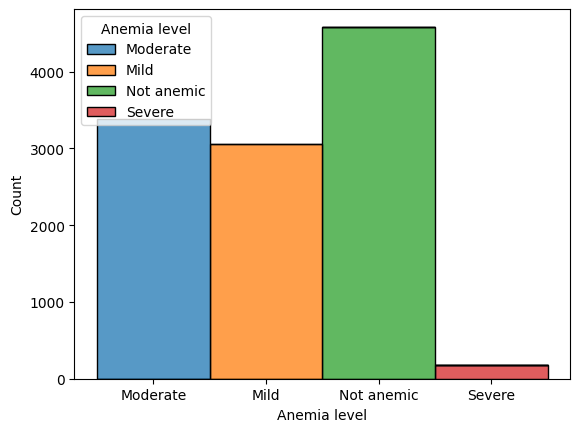

In [116]:
sns.histplot(data=data, x='Anemia level', hue='Anemia level', multiple='stack')

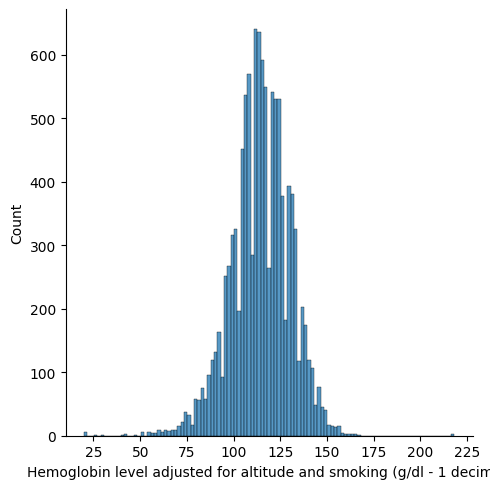

In [117]:
sns.displot(data['Hemoglobin level adjusted for altitude and smoking (g/dl - 1 decimal)'])

<Axes: >

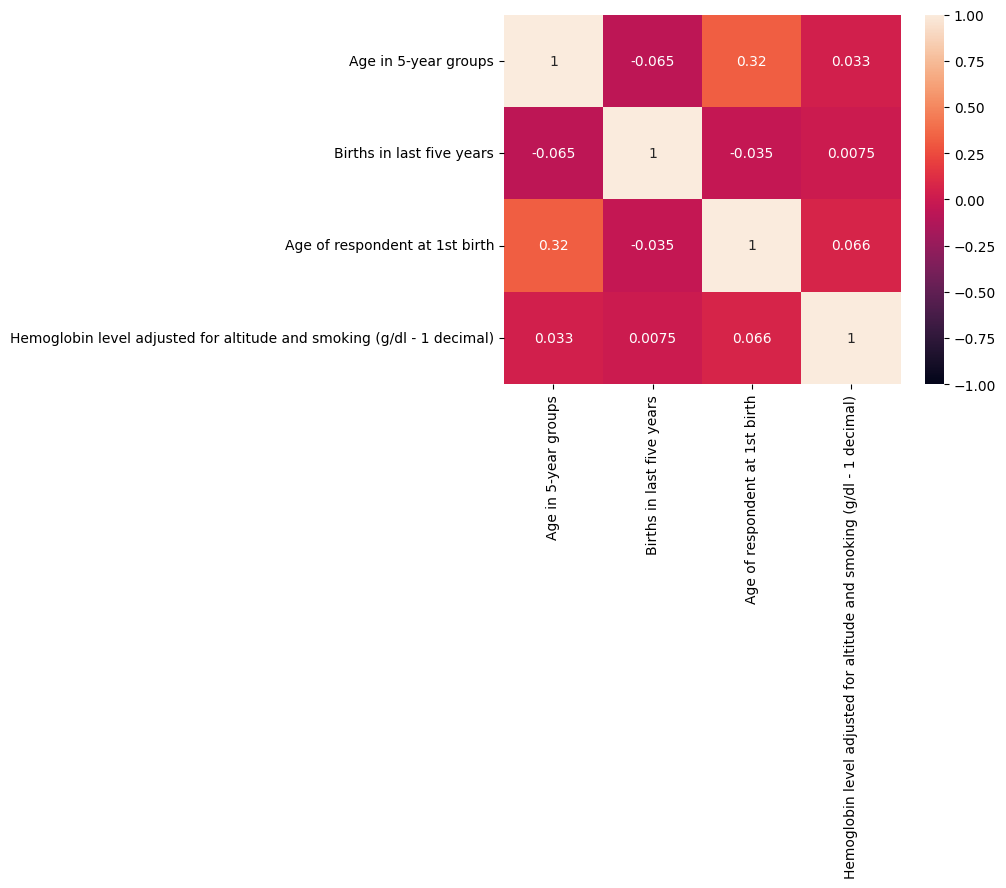

In [119]:
sns.heatmap(data.select_dtypes('number').corr(), annot=True, vmin=-1, vmax=1)

In [86]:
for category in categorical_columns:
    data[category] = data[category].astype('category')
data[label_columns] = data[label_columns].astype('category')

for categorical in categorical_columns:
    print(data[categorical].cat.categories, categorical)
print(data[label_columns].cat.categories, "Label")

Index(['Rural', 'Urban'], dtype='object') Type of place of residence
Index(['Higher', 'No education', 'Primary', 'Secondary'], dtype='object') Highest educational level
Index(['Middle', 'Poorer', 'Poorest', 'Richer', 'Richest'], dtype='object') Wealth index combined
Index(['No', 'Yes'], dtype='object') Have mosquito bed net for sleeping (from household questionnaire)
Index(['No', 'Yes'], dtype='object') Smokes cigarettes
Index(['Living with her', 'Staying elsewhere'], dtype='object') Currently residing with husband/partner
Index(['No', 'Yes'], dtype='object') Had fever in last two weeks
Index(['No', 'Yes'], dtype='object') Taking iron pills, sprinkles or syrup
Index(['Mild', 'Moderate', 'Not anemic', 'Severe'], dtype='object') Label


In [87]:
categorical_np = [data[i].cat.codes.values for i in categorical_columns]
categorical_data = np.stack(categorical_np, 1)
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[1, 3, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 3, 4, 1, 0, 0, 0, 1],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 1],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 0, 4, 1, 0, 0, 0, 0],
        [1, 3, 4, 1, 0, 0, 0, 1]])

In [88]:
numerical_data = np.stack([data[i].values for i in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:10]

tensor([[ 27.,   1.,  25.,  95.],
        [ 32.,   1.,  30., 113.],
        [ 37.,   2.,  32., 121.],
        [ 22.,   1.,  19., 108.],
        [ 27.,   1.,  24., 116.],
        [ 22.,   2.,  19., 118.],
        [ 22.,   2.,  19., 118.],
        [ 27.,   2.,  22., 134.],
        [ 27.,   2.,  22., 134.],
        [ 27.,   2.,  22.,  95.]])

In [89]:
outputs = torch.tensor(data[label_columns].cat.codes.values).flatten()
outputs[:10]

tensor([1, 0, 2, 1, 0, 0, 0, 2, 2, 1], dtype=torch.int8)

In [90]:
categorical_data.shape, numerical_data.shape, outputs.shape

(torch.Size([11206, 8]), torch.Size([11206, 4]), torch.Size([11206]))

In [91]:
categorical_column_sizes = [len(data[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(2, 1), (4, 2), (5, 3), (2, 1), (2, 1), (2, 1), (2, 1), (2, 1)]


In [92]:
total_records = data.shape[0]
test_records = int(total_records * .2) # 20% of the data for testing
train_records = total_records - test_records # 80% of the data for training

categorical_train_data = categorical_data[:train_records]
categorical_test_data = categorical_data[train_records:]
numerical_train_data = numerical_data[:train_records]
numerical_test_data = numerical_data[train_records:]
train_label = outputs[:train_records]
test_label = outputs[train_records:]

print(categorical_train_data.shape, categorical_test_data.shape)
print(numerical_train_data.shape, numerical_test_data.shape)
print(train_label.shape, test_label.shape)

torch.Size([8965, 8]) torch.Size([2241, 8])
torch.Size([8965, 4]) torch.Size([2241, 4])
torch.Size([8965]) torch.Size([2241])


In [93]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x #(batch_size, output_size)

In [94]:
hidden_layers = [200,100,50]
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 4, hidden_layers, p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(4, 2)
    (2): Embedding(5, 3)
    (3-7): 5 x Embedding(2, 1)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (batch_norm_num): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=15, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in

In [95]:
if torch.backends.mps.is_available():
    print ("MPS device found.")
else:
    print("MPS device not found.")

mps_device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model.to(mps_device)
categorical_train_data = categorical_train_data.to(mps_device)
numerical_train_data = numerical_train_data.to(mps_device)
categorical_test_data = categorical_test_data.to(mps_device)
numerical_test_data = numerical_test_data.to(mps_device)
train_label = train_label.to(mps_device)
test_label = test_label.to(mps_device)  

MPS device found.


In [96]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 300

epoch:   1 loss: 1.65125096
epoch:  26 loss: 0.69338137
epoch:  51 loss: 0.49093953
epoch:  76 loss: 0.42834988
epoch: 101 loss: 0.39301467
epoch: 126 loss: 0.37243554
epoch: 151 loss: 0.35621601
epoch: 176 loss: 0.33760968
epoch: 201 loss: 0.33347204
epoch: 226 loss: 0.32277015
epoch: 251 loss: 0.31248808
epoch: 276 loss: 0.30814350
epoch: 300 loss: 0.3037334979


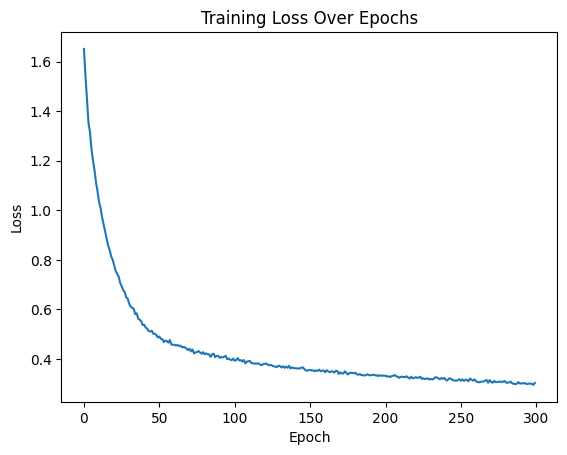

In [97]:
aggregated_losses = []

for i in range(epochs):
    i += 1
    pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(pred, train_label)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()
print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

aggregated_losses_on_cpu = [tensor.detach().cpu() for tensor in aggregated_losses]
plt.plot(range(epochs), aggregated_losses_on_cpu)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [98]:
with torch.no_grad():
    eval = model(categorical_test_data, numerical_test_data)
    loss = loss_function(eval, test_label)
print(f'Loss: {loss:.8f}')

Loss: 0.39806932


In [99]:
print(eval[:5])
eval = np.argmax(eval.detach().cpu(), axis=1)
print(eval[:5])

tensor([[ 0.5230,  3.3567, -2.3371, -0.8204],
        [ 1.9512,  3.6928, -3.4790, -1.9168],
        [-0.6001, -5.1798,  6.6719, -0.3164],
        [-3.4348, -2.3460,  5.1482, -0.1291],
        [-3.2668, -3.8399,  6.6155,  1.3903]], device='mps:0')
tensor([1, 1, 2, 2, 2])


In [100]:
test_label = test_label.detach().cpu()
print(confusion_matrix(test_label,eval))
print("--------------------------------------------------------------------------------")
print(classification_report(test_label,eval))
print("--------------------------------------------------------------------------------")
print(f"accuracy: {accuracy_score(test_label, eval)*100} %")

[[444 178   1   0]
 [  1 576   0   6]
 [129  16 859   0]
 [  0   8   0  23]]
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       623
           1       0.74      0.99      0.85       583
           2       1.00      0.86      0.92      1004
           3       0.79      0.74      0.77        31

    accuracy                           0.85      2241
   macro avg       0.83      0.82      0.82      2241
weighted avg       0.87      0.85      0.85      2241

--------------------------------------------------------------------------------
accuracy: 84.87282463186078 %
